In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('notebook_repr_html',True)

from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'league',
              'transition': 'fade',
              'center': 'false',
              'overview' : 'true',
              'start_slideshow_at': 'selected'
})

%matplotlib inline

# Convolutional Neural Networks in Keras

[Fabio A. González](http://dis.unal.edu.co/~fgonza/), Universidad Nacional de Colombia

## CIFAR-10  Dataset

* Collected by [Krizhevsky et al.](https://www.cs.toronto.edu/~kriz/cifar.html)
* Labeled subsets of the 80 million tiny images dataset (http://people.csail.mit.edu/torralba/tinyimages/)
* 60000 32x32 colour images in 10 classes (6000 images per class). 
* 50000 training images and 10000 test images. 

## CIFAR-10  Dataset

<img  src="cifar.png" width="500">

## Loading the dataset

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


TypeError: only integer scalar arrays can be converted to a scalar index

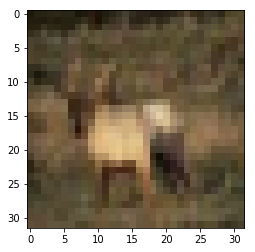

In [8]:
from __future__ import print_function
from keras.datasets import cifar10
# input image dimensions
img_rows, img_cols = 32, 32
# the CIFAR10 images are RGB
img_channels = 3

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
          'horse', 'ship', 'truck']
plt.imshow(X_train[3])
print(LABELS[y_train[3]])

## Loading a pretrained model

In [9]:
from keras.models import load_model

model = load_model('100ep_cifar100d.h5')
model.summary(70)

/home/sebas/Programas/Anaconda3/lib/python3.6/site-packages/keras/engine/topology.py:1242: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(name="convolution2d_1", activity_regularizer=None, trainable=True, input_dtype="float32", batch_input_shape=[None, 32,..., activation="linear", kernel_size=(3, 3), filters=32, strides=[1, 1], padding="same", data_format="channels_last", kernel_initializer="glorot_uniform", kernel_regularizer=None, bias_regularizer=None, kernel_constraint=None, bias_constraint=None, use_bias=True)`
  return cls(**config)
/home/sebas/Programas/Anaconda3/lib/python3.6/site-packages/keras/engine/topology.py:1242: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(name="convolution2d_2", activity_regularizer=None, trainable=True, activation="linear", kernel_size=(3, 3), filters=32, strides=[1, 1], padding="valid", data_format="channels_last", kernel_initializer="glorot_uniform", kernel_regularizer=None, bias_regularizer=None, kernel_con

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
convolution2d_1 (Conv2D)       (None, 32, 32, 32)          896        
______________________________________________________________________
activation_1 (Activation)      (None, 32, 32, 32)          0          
______________________________________________________________________
convolution2d_2 (Conv2D)       (None, 30, 30, 32)          9248       
______________________________________________________________________
activation_2 (Activation)      (None, 30, 30, 32)          0          
______________________________________________________________________
maxpooling2d_1 (MaxPooling2D)  (None, 15, 15, 32)          0          
______________________________________________________________________
dropout_1 (Dropout)            (None, 15, 15, 32)          0          
______________________________________________________________________
convol

In [14]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

#SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Classification of new images

In [ ]:
idx = 102
plt.imshow(X_test[idx])
model.predict_proba(X_test[idx:idx+1], verbose=0)

In [ ]:
from keras import backend as K
def get_layer_values(model, layer, in_val):
    return K.function([model.layers[0].input, K.learning_phase()],
                      [model.layers[layer].output])([[in_val], 0])[0][0]

## Most likely labels

In [ ]:
idx = 133
plt.imshow(X_test[idx])
plt.show()
activations = get_layer_values(model, 16, X_test[idx])
vals = [(activations[i], LABELS[i]) for i in range(10)]
sorted(vals, reverse=True)

## How does the network see?

In [ ]:

def visualize_weights(model, layer, shape=(4, 8)):
    values = model.layers[layer].get_weights()[0]
    filters = values.shape[3]
    plt.figure(figsize=(9, 9./shape[1]*shape[0]))
    for i in range(filters):
        plt.subplot(shape[0], shape[1], i + 1)
        plt.imshow(values[:,:,0,i], cmap=plt.get_cmap('gray'))
        plt.axis("off")
    plt.show()

def visualize_layer(model, layer, in_val, shape=(8,4)):
    values = get_layer_values(model, layer, in_val)
    filters = values.shape[2]
    plt.figure(figsize=(9, 9./shape[1]*shape[0]))
    for i in range(filters):
        plt.subplot(shape[0], shape[1], i + 1)
        plt.imshow(values[:,:,i])
        plt.axis("off")
    plt.show()
        

In [ ]:
visualize_weights(model, 0)

## Internal representation (layer 1)

In [ ]:
idx = 133
plt.figure(figsize=(2,2)); plt.imshow(X_test[idx]); plt.show()
visualize_layer(model, 1, X_test[idx],shape=(4,8))

## Internal representation (layer 3)

In [ ]:
visualize_layer(model, 3, X_test[idx],shape=(4, 8))

## Internal representation (layer 7)

In [ ]:
visualize_layer(model, 7, X_test[idx],shape=(8,8))

## Internal representation (layer 9)

In [ ]:
visualize_layer(model, 9, X_test[idx],shape=(8,8))